In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [41]:
import readsolar as rs
import matplotlib.pyplot as plt
# %matplotlib inline
import pandas as pd

In [3]:
sol_id_pdf = rs.read_solar()

In [5]:
sol_id_pdf.head()

,Month,Current,Power,Performance,Wind,Temp,Humid,GRad,DRad,WindD,Rain
Timestamp,,,,,,,,,,,
2013-05-24 00:00:00,5,0.333667,0.0,NaN,0.987729,8.613059,82.695496,3.097217,1.291908,219.366669,0.0
2013-05-24 00:05:00,5,0.327645,0.0,0.0,0.956214,8.474399,83.062256,2.898489,1.207527,216.402603,0.0
2013-05-24 00:10:00,5,0.332000,0.0,0.0,0.981474,8.443656,83.128723,2.896453,1.202139,209.872070,0.0
2013-05-24 00:15:00,5,0.341667,0.0,0.0,1.003397,8.409176,83.162605,2.936822,1.221855,223.326996,0.0
2013-05-24 00:20:00,5,0.368667,0.0,0.0,0.950703,8.390579,83.621986,2.965931,1.160901,229.209442,0.0


### Filter 2 Years

In [20]:
sol_2y_pdf = sol_id_pdf.loc['2017':'2019']
sol_2y_pdf .tail()

,Month,Current,Power,Performance,Wind,Temp,Humid,GRad,DRad,WindD,Rain
Timestamp,,,,,,,,,,,
2019-12-31 23:35:00,12,0.3,0.0,0.0,0.0,29.984341,21.846844,0.915584,0.817822,33.086002,0.2
2019-12-31 23:40:00,12,0.3,0.0,0.0,0.0,29.960859,21.698957,0.818077,0.644404,33.135098,0.2
2019-12-31 23:45:00,12,0.3,0.0,0.0,0.0,29.955965,21.564404,0.690323,0.627243,33.130482,0.2
2019-12-31 23:50:00,12,0.3,0.0,0.0,0.0,29.849651,21.630070,0.924088,0.786829,33.163658,0.2
2019-12-31 23:55:00,12,0.3,0.0,0.0,0.0,29.837481,21.602827,0.809160,0.652423,33.192440,0.2


In [21]:
#plt.style.available

In [22]:
plt.style.use('seaborn-notebook')

### Outliers

### Temp

Text(0.5, 0, 'Temperature')

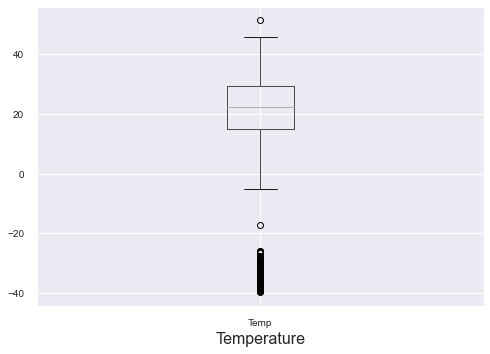

In [23]:
ax = sol_2y_pdf[['Temp']].boxplot()

ax.set_xlabel('Temperature', fontsize=16)
# ax.set_ylabel('Temp', fontsize=16)
plt.show()

In [62]:
y = sol_2y_pdf['Temp']
removed_outliers = y.between(y.quantile(.02), y.quantile(.98))

print(str(y[removed_outliers].size) + " out of " + str(sol_2y_pdf['Temp'].size) + " data points remaining.") 
print("Outliers count : ", (sol_2y_pdf['Temp'].size) - (y[removed_outliers].size)) 

# ## Remove outliers
# sol_2y_pdf['TempFlt'] = y[removed_outliers].to_frame()
# sol_2y_pdf[['TempFlt']].boxplot()

285459 out of 297355 data points remaining.
Outliers count :  11896


### Humid

Text(0.5, 0, 'Humidity')

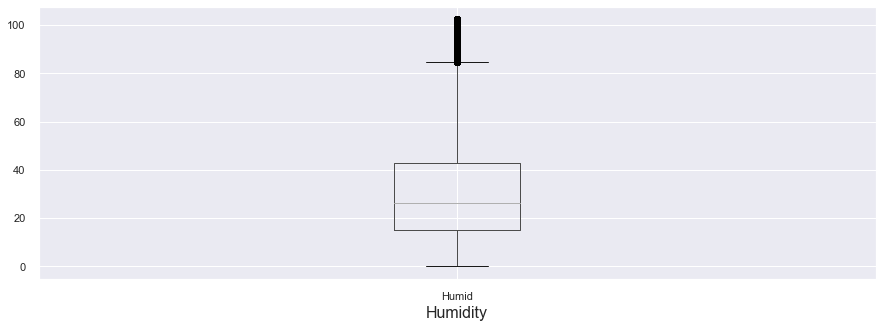

In [63]:
ax = sol_2y_pdf[['Humid']].boxplot()

ax.set_xlabel('Humidity', fontsize=16)
# ax.set_ylabel('Temp', fontsize=16)
plt.show()

### Power

Text(0.5, 0, 'Power')

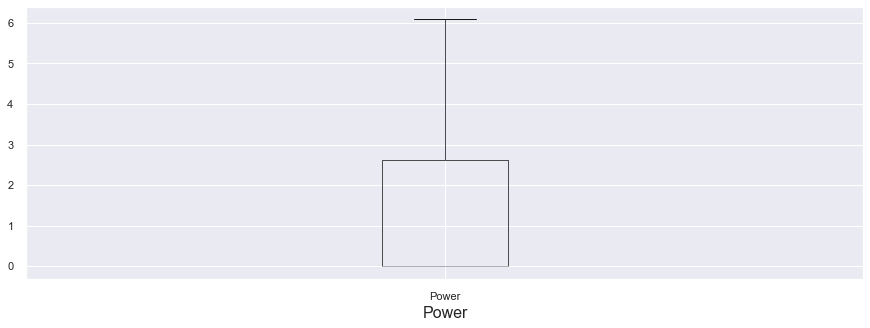

In [64]:
ax = sol_2y_pdf[['Power']].boxplot()

ax.set_xlabel('Power', fontsize=16)
# ax.set_ylabel('Temp', fontsize=16)
plt.show()

### Power analysis

In [65]:
# sol_2y_pdf.loc[sol_2y_pdf['Power'] > 0 ].shape
sol_2y_pdf.shape

(297355, 12)

In [66]:
sol_2y_pdf.loc[sol_2y_pdf['Power'] == 0 ].shape

(151482, 12)

In [67]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 5)})

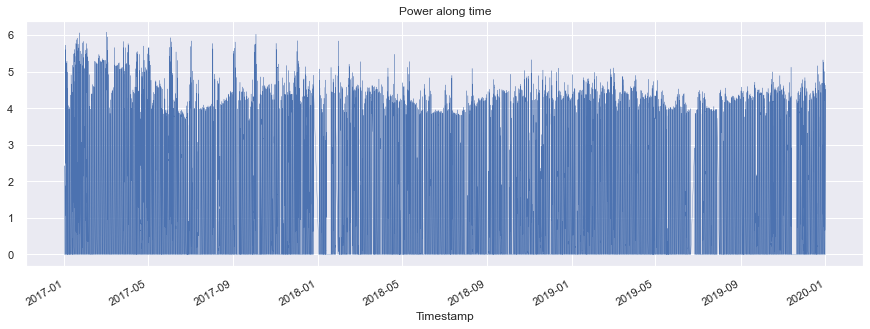

In [68]:
sol_2y_pdf['Power'].plot(linewidth=0.3, title='Power along time');

In [69]:
sol_2y_pdf['date'] =  sol_2y_pdf.index.date 

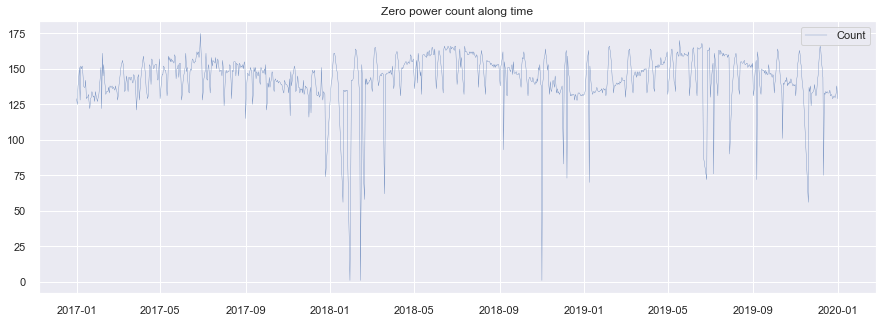

In [70]:
sol_2y_pdf['date'].loc[sol_2y_pdf['Power'] == 0 ].value_counts().to_frame('Count').plot(linewidth=0.3, title="Zero power count along time");

Text(0, 0.5, 'Daily Totals')

Text(0, 0.5, 'Daily Totals')

Text(0, 0.5, 'Daily Totals')

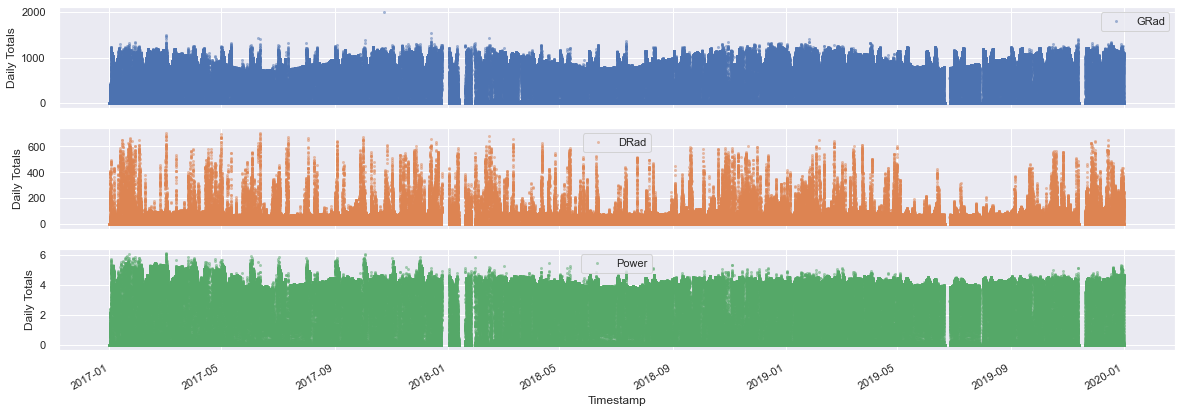

In [71]:
cols_plot = ['GRad', 'DRad', 'Power']
axes = sol_2y_pdf[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 7), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals')

## Monthly distribution with boxplot 

### Seasonality 2017

<AxesSubplot:xlabel='Month', ylabel='Temp'>

Text(0.5, 1.0, 'Monthly distribution of Temp')

Text(0.5, 0, '')

<AxesSubplot:xlabel='Month', ylabel='Humid'>

Text(0.5, 1.0, 'Monthly distribution of Humid')

Text(0.5, 0, '')

<AxesSubplot:xlabel='Month', ylabel='WindD'>

Text(0.5, 1.0, 'Monthly distribution of WindD')

Text(0.5, 0, '')

<AxesSubplot:xlabel='Month', ylabel='GRad'>

Text(0.5, 1.0, 'Monthly distribution of GRad')

Text(0.5, 0, '')

<AxesSubplot:xlabel='Month', ylabel='DRad'>

Text(0.5, 1.0, 'Monthly distribution of DRad')

Text(0.5, 0, '')

<AxesSubplot:xlabel='Month', ylabel='Power'>

Text(0.5, 1.0, 'Monthly distribution of Power')

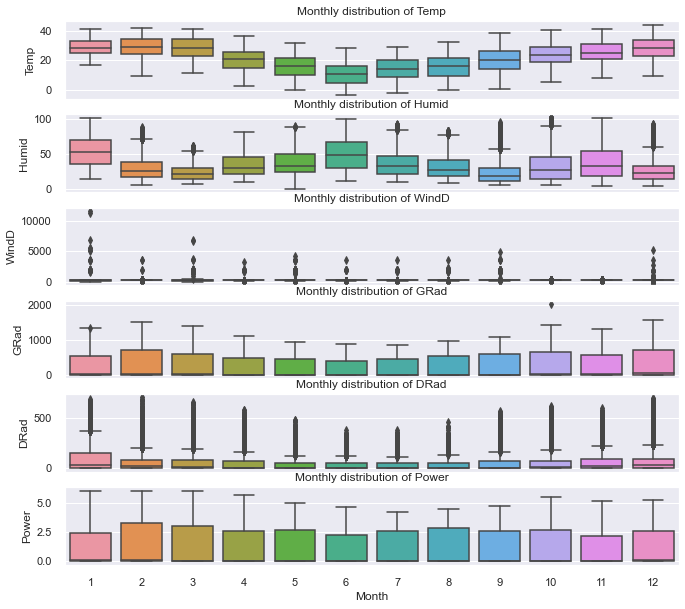

In [76]:
fig, axes = plt.subplots(6, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Temp', 'Humid', 'WindD', 'GRad', 'DRad', 'Power'], axes):
    sns.boxplot(data=sol_2y_pdf.loc['2017-01':'2017-12'], x='Month', y=name, ax=ax)
    ax.set_title("Monthly distribution of " + name )
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

### Seasonality 2018

<AxesSubplot:xlabel='Month', ylabel='Temp'>

Text(0.5, 1.0, 'Monthly distribution of Temp')

Text(0.5, 0, '')

<AxesSubplot:xlabel='Month', ylabel='Humid'>

Text(0.5, 1.0, 'Monthly distribution of Humid')

Text(0.5, 0, '')

<AxesSubplot:xlabel='Month', ylabel='WindD'>

Text(0.5, 1.0, 'Monthly distribution of WindD')

Text(0.5, 0, '')

<AxesSubplot:xlabel='Month', ylabel='GRad'>

Text(0.5, 1.0, 'Monthly distribution of GRad')

Text(0.5, 0, '')

<AxesSubplot:xlabel='Month', ylabel='DRad'>

Text(0.5, 1.0, 'Monthly distribution of DRad')

Text(0.5, 0, '')

<AxesSubplot:xlabel='Month', ylabel='Power'>

Text(0.5, 1.0, 'Monthly distribution of Power')

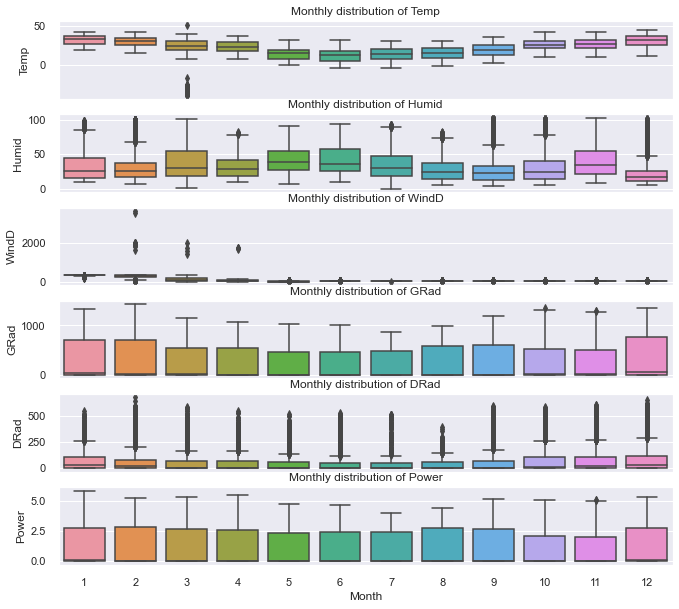

In [77]:
fig, axes = plt.subplots(6, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Temp', 'Humid', 'WindD', 'GRad', 'DRad', 'Power'], axes):
    sns.boxplot(data=sol_2y_pdf.loc['2018-01':'2018-12'], x='Month', y=name, ax=ax);
    ax.set_title("Monthly distribution of " + name )    
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

### Resampling
#### Down sample to weekly mean.

Follow resampling here: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/



In [78]:
data_columns = ['Power','Temp', 'Humid', 'WindD', 'GRad', 'DRad']
# Resample to weekly frequency, aggregating with mean
sol_weekly_mean = sol_2y_pdf[data_columns].resample('W').mean()
sol_weekly_mean.head(3)

,Power,Temp,Humid,WindD,GRad,DRad
Timestamp,,,,,,
2017-01-01,0.591724,24.983173,60.977507,239.343832,110.548441,106.638682
2017-01-08,1.350014,18.885981,36.490850,273.576724,263.137355,39.455023
2017-01-15,1.100594,22.173359,54.338197,312.900134,252.162788,88.444367


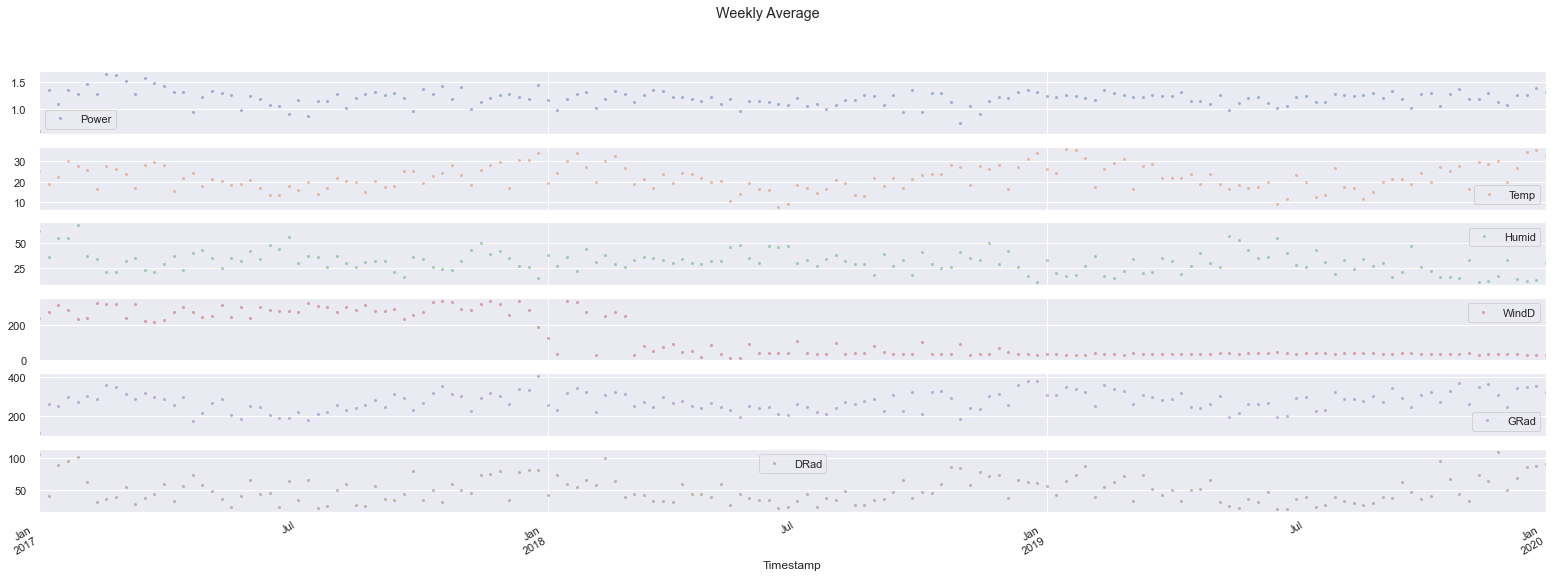

In [81]:
cols_plot = ['Power', 'Temp', 'Humid', 'WindD', 'GRad', 'DRad']
axes = sol_weekly_mean[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(27, 9), subplots=True, title = 'Weekly Average')
# for ax in axes:
#     ax.set_ylabel('Daily Totals')


https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/